# Classification prediction (Batch classifier comparison)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

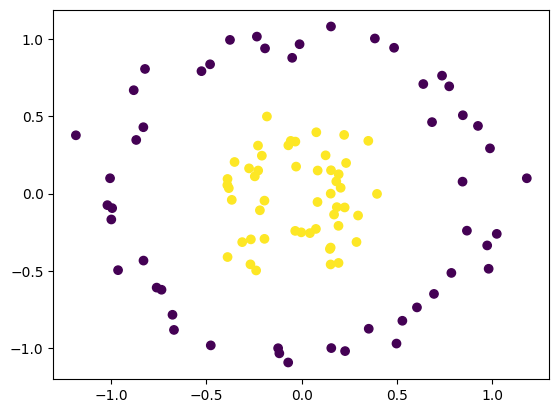

In [2]:
# Prepare dataset.
X_circle, y_circle = make_circles(
    random_state=48,
    n_samples=100,
    noise=0.1,
    factor=0.3
)

plt.scatter(
    X_circle[:, 0],
    X_circle[:, 1],
    c=y_circle
)
plt.show()